**Project Goal**:

The goal of this project is to compare various classification algorithms to find the one which is more accurate and appropriate for this dataset. Deciding a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. 

Data Source: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

Train Data Shape: 

            Rows- 381109 
            
            Columns - 12

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample,shuffle
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns

Reading the CSV

In [3]:
train_df= pd.read_csv("/content/gdrive/My Drive/insurance_dataset/train.csv",index_col=None)
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Checking the data types.

In [15]:
train_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
type                     object
dtype: object

In [16]:
test_df= pd.read_csv("/content/gdrive/My Drive/insurance_dataset/test.csv",index_col=None)
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


Checking the data types for the test data frame.

In [17]:
test_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

Checking the shape of the data.

In [18]:
print('Train Data Shape: ', train_df.shape)
print('Test Data Shape: ', test_df.shape)

Train Data Shape:  (381109, 13)
Test Data Shape:  (127037, 11)


Checking if the data has any missing values.

In [19]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
type                    0
dtype: int64

To check how many number of YES and NO responses are there.

In [20]:
train_df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [21]:
train_df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
type                         1
dtype: int64

Checking the number of people interested to the ones with a response not interested.

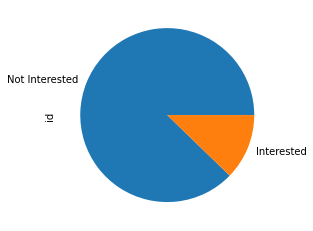

In [22]:
train_df.groupby('Response').count()['id'].plot(kind = 'pie', labels = ['Not Interested', 'Interested'])
plt.show()

Checking the Annual Premium Distribution to see where most of the values lie. We can see that the distribution is highly skewed to the right.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


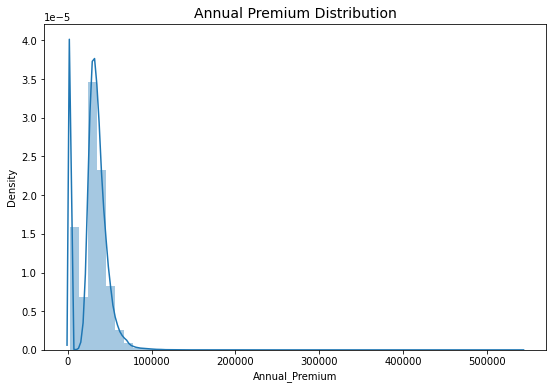

In [23]:
train_df['type'] = 'train'
test_df['type'] = 'test'
trainandtest_df= pd.concat([train_df, test_df])
plt.figure(figsize = (9, 6))
sns.distplot(trainandtest_df['Annual_Premium'])
plt.title('Annual Premium Distribution', fontsize = 14)
plt.show()

Checking the co-relation matrix to see if there is any positive or negative correlation of response with other variables. We see that it has a high negative correlation with previously insured. 

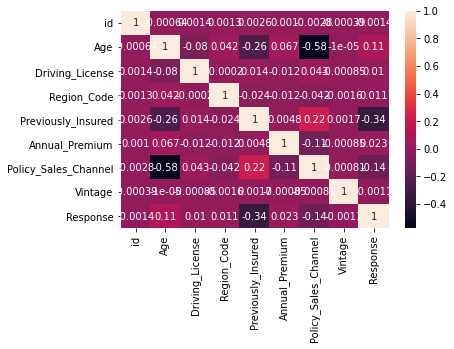

In [24]:
corrMatrix = trainandtest_df.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

Checking the number of outliers in Annual Premium using a box plot. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


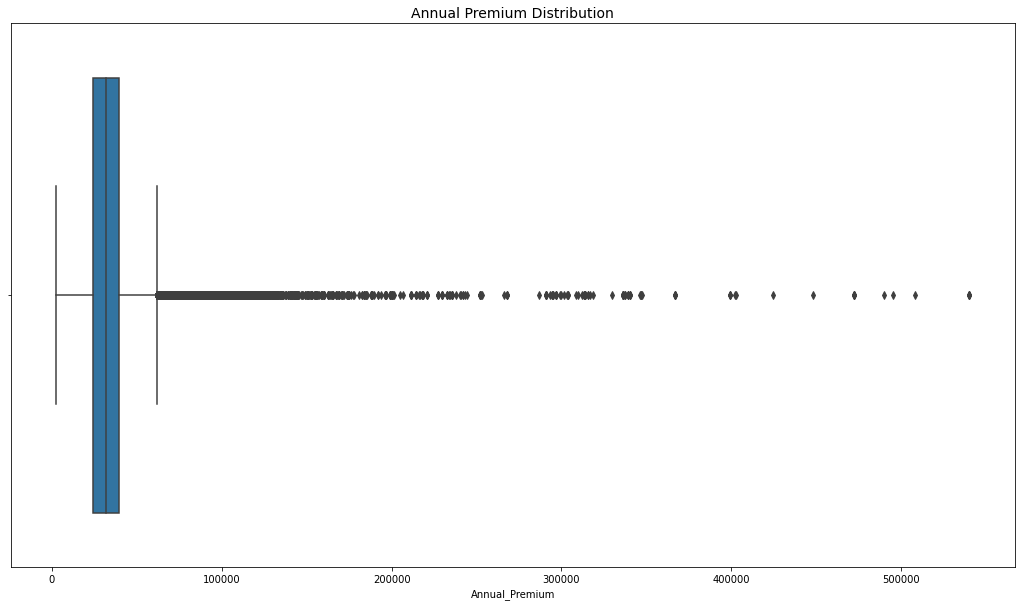

In [25]:
plt.figure(figsize = (18, 10))
sns.boxplot(trainandtest_df['Annual_Premium'])
plt.title('Annual Premium Distribution', fontsize = 14)
plt.show()

Here we can see that there is a class imbalance. We have to rectify that before addressing the problem. 

**References:**

1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

2. https://stackoverflow.com/questions/50325786/sci-kit-learn-how-to-print-labels-for-confusion-matrix

3. https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.boxplot.html




